In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-05-04 23:51:21.979089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#"APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"
com='APPLE'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...
2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
1,2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2,2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
3,2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
4,2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...,...
2515,2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2516,2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2517,2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC
2518,2024-05-02,161.389999,162.820007,159.419998,162.639999,162.639999,5030400,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...
2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2155

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.51787675],
       [-0.49277183],
       [-0.49299773],
       ...,
       [-0.53752824],
       [-0.5280413 ],
       [-0.52329783]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape[1]

60

In [21]:
y_train.shape[0]

2095

In [22]:
x_train.shape

(2095, 60, 1)

In [23]:
com='META'
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,236.059998,238.199997,232.929993,233.520004,233.272491,17889400,META
2023-05-05,232.240005,234.679993,229.850006,232.779999,232.533279,26978900,META
2023-05-08,231.419998,235.619995,230.270004,233.270004,233.022766,16400500,META
2023-05-09,231.460007,235.880005,231.080002,233.369995,233.122650,16865600,META
2023-05-10,236.169998,236.750000,230.720001,233.080002,232.832962,19119000,META
...,...,...,...,...,...,...,...
2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600,META
2024-04-30,431.049988,439.619995,429.720001,430.170013,430.170013,18429500,META
2024-05-01,428.600006,449.959991,427.109985,439.190002,439.190002,20344900,META


In [24]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [25]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [26]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [27]:
from keras.layers import Input, Dense
from keras.models import Model

In [28]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [29]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

21/21 [==============================] - 0s 953us/step - loss: 0.4624


In [31]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [32]:
dataset

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [33]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Date,
2023-11-21,95.682365
2023-11-22,95.450920
2023-11-24,95.746208
2023-11-27,95.746208
2023-11-28,94.852356
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [34]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [35]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

4/4 [==============================] - 0s 1ms/step


array([[0.00572475],
       [0.00576049],
       [0.00576088],
       [0.00576036],
       [0.00573131],
       [0.005731  ],
       [0.005723  ],
       [0.00573494],
       [0.00577322],
       [0.00578167],
       [0.00585401],
       [0.00583082],
       [0.00586354],
       [0.00587166],
       [0.00589587],
       [0.00592472],
       [0.00591445],
       [0.00596465],
       [0.00594404],
       [0.00601966],
       [0.00599524],
       [0.0060537 ],
       [0.00605035],
       [0.00608665],
       [0.00615775],
       [0.00616393],
       [0.00618363],
       [0.00620472],
       [0.00626978],
       [0.00627026],
       [0.00626009],
       [0.00627028],
       [0.0063114 ],
       [0.00638438],
       [0.00640155],
       [0.00642274],
       [0.00651301],
       [0.00656816],
       [0.00661393],
       [0.00664251],
       [0.00669104],
       [0.00676983],
       [0.00680525],
       [0.00686396],
       [0.00685461],
       [0.00689106],
       [0.00689952],
       [0.006

In [36]:
len(predictions)

113

In [37]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [38]:
predictions = scaler.inverse_transform(predictions)

In [39]:
mse = np.mean(predictions -f_app)
mse

69.51320693995274

In [40]:
predictions

array([[328.0541 ],
       [328.0652 ],
       [328.0653 ],
       [328.06516],
       [328.05612],
       [328.05603],
       [328.05356],
       [328.05725],
       [328.06912],
       [328.07172],
       [328.09415],
       [328.08698],
       [328.0971 ],
       [328.0996 ],
       [328.10712],
       [328.11606],
       [328.11288],
       [328.12842],
       [328.12204],
       [328.1455 ],
       [328.1379 ],
       [328.15604],
       [328.155  ],
       [328.16626],
       [328.18826],
       [328.1902 ],
       [328.1963 ],
       [328.20282],
       [328.223  ],
       [328.22314],
       [328.22   ],
       [328.22314],
       [328.2359 ],
       [328.2585 ],
       [328.26382],
       [328.2704 ],
       [328.29837],
       [328.31546],
       [328.32965],
       [328.33853],
       [328.35355],
       [328.378  ],
       [328.38895],
       [328.40714],
       [328.40424],
       [328.41556],
       [328.41818],
       [328.43292],
       [328.44452],
       [328.46967],


In [41]:
    import random
    random.random()

0.17312600911935616

In [42]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [43]:
    Final_pred

array([[209.72998],
       [209.74106],
       [209.74118],
       [209.74103],
       [209.732  ],
       [209.7319 ],
       [209.72943],
       [209.73312],
       [209.745  ],
       [209.74759],
       [209.77002],
       [209.76285],
       [209.77298],
       [209.77548],
       [209.78299],
       [209.79193],
       [209.78876],
       [209.80429],
       [209.79791],
       [209.82138],
       [209.81378],
       [209.83191],
       [209.83087],
       [209.84213],
       [209.86414],
       [209.86606],
       [209.87216],
       [209.8787 ],
       [209.89886],
       [209.89902],
       [209.89587],
       [209.89902],
       [209.91177],
       [209.93439],
       [209.9397 ],
       [209.94626],
       [209.97424],
       [209.99133],
       [210.00552],
       [210.0144 ],
       [210.02942],
       [210.05386],
       [210.06482],
       [210.08301],
       [210.08011],
       [210.09143],
       [210.09406],
       [210.1088 ],
       [210.12039],
       [210.14554],


In [44]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

252

In [45]:
    len(data[138:252])

114

In [46]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [47]:
    valid

,Close_app,Predictions
0,233.520004,209.729980
1,232.779999,209.741058
2,233.270004,209.741180
3,233.369995,209.741028
4,233.080002,209.731995
...,...,...
108,318.359985,212.694855
109,321.839996,212.815063
110,327.820007,213.038666
111,324.160004,213.145233


In [48]:
    dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400,APPLE
1,2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400,APPLE
2,2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800,APPLE
3,2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900,APPLE
4,2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500,APPLE
...,...,...,...,...,...,...,...,...
2515,2024-04-29,163.000000,166.070007,163.000000,164.490005,164.490005,5371700,GENERAL_ELC
2516,2024-04-30,163.559998,166.259995,161.580002,161.820007,161.820007,6723600,GENERAL_ELC
2517,2024-05-01,162.570007,163.300003,158.820007,159.699997,159.699997,4775800,GENERAL_ELC
2518,2024-05-02,161.389999,162.820007,159.419998,162.639999,162.639999,5030400,GENERAL_ELC


In [49]:
    dfxfs = dfxf[['Date', 'Close']]
    dfxfs

,Date,Close
0,2023-05-04,165.789993
1,2023-05-05,173.570007
2,2023-05-08,173.500000
3,2023-05-09,171.770004
4,2023-05-10,173.559998
...,...,...
2515,2024-04-29,164.490005
2516,2024-04-30,161.820007
2517,2024-05-01,159.699997
2518,2024-05-02,162.639999


In [50]:
    dfxf['Date']

0       2023-05-04
1       2023-05-05
2       2023-05-08
3       2023-05-09
4       2023-05-10
           ...    
2515    2024-04-29
2516    2024-04-30
2517    2024-05-01
2518    2024-05-02
2519    2024-05-03
Name: Date, Length: 2520, dtype: object

In [51]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [52]:
    dfxfs.index = dfxfs.pop('Date')
    dfxfs

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [53]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

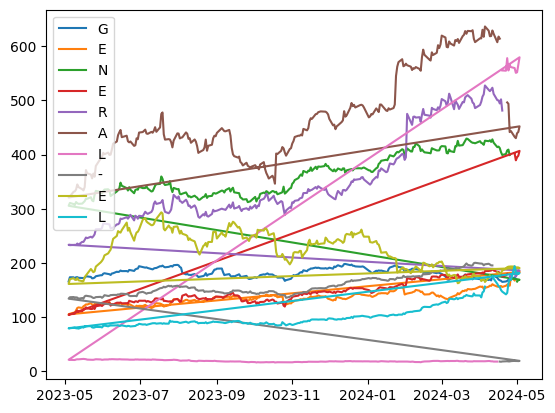

In [54]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [55]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-04,236.059998,238.199997,232.929993,233.520004,233.272491,17889400,META
2023-05-05,232.240005,234.679993,229.850006,232.779999,232.533279,26978900,META
2023-05-08,231.419998,235.619995,230.270004,233.270004,233.022766,16400500,META
2023-05-09,231.460007,235.880005,231.080002,233.369995,233.122650,16865600,META
2023-05-10,236.169998,236.750000,230.720001,233.080002,232.832962,19119000,META
...,...,...,...,...,...,...,...
2024-04-29,439.559998,439.760010,428.559998,432.619995,432.619995,21502600,META
2024-04-30,431.049988,439.619995,429.720001,430.170013,430.170013,18429500,META
2024-05-01,428.600006,449.959991,427.109985,439.190002,439.190002,20344900,META


In [56]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [57]:
    df_app_c

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [58]:
    dfxfs

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [59]:
    df_g = df_app_c
    df_g

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [60]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Date,
2023-05-04,233.520004
2023-05-05,232.779999
2023-05-08,233.270004
2023-05-09,233.369995
2023-05-10,233.080002
...,...
2024-04-29,432.619995
2024-04-30,430.170013
2024-05-01,439.190002


In [61]:
    dfxfs

,Close
Date,
2023-05-04,165.789993
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004
2023-05-10,173.559998
...,...
2024-04-29,164.490005
2024-04-30,161.820007
2024-05-01,159.699997


In [62]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([233.52000427, 232.77999878, 233.27000427, ..., 439.19000244,
       441.67999268, 451.95999146])

In [63]:
    fcv = np.array(dfxfs['Close'])

In [64]:
    len(fcv)

2520

In [65]:
    mseallfe = np.zeros(len(dfxfs))

In [66]:
    dfxfs[1:4]

,Close
Date,
2023-05-05,173.570007
2023-05-08,173.500000
2023-05-09,171.770004


In [67]:
    for i in range(0,len(dfxfs)):
        mseallfe[i] = fcv[i]-fxv[i]
        

In [68]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

2520

In [69]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

2520

In [70]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [71]:
    len(final_df)

2520

In [72]:
    len(mseallfe)

2520

In [73]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([233.52000427, 232.77999878, 233.27000427, ..., 439.19000244,
       441.67999268, 451.95999146])

In [74]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,233.520004
1,232.779999
2,233.270004
3,233.369995
4,233.080002
...,...
2515,432.619995
2516,430.170013
2517,439.190002
2518,441.679993


In [75]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [76]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

736

In [77]:
    datasetx

,Close
1746,519.830017
1747,523.159973
1748,511.899994
1749,500.230011
1750,499.760010
...,...
2515,432.619995
2516,430.170013
2517,439.190002
2518,441.679993


In [78]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[ 0.94900863],
       [ 0.97161832],
       [ 0.89516546],
       [ 0.81592875],
       [ 0.81273754],
       [ 0.77478266],
       [ 0.82658856],
       [ 0.6858364 ],
       [ 0.69031768],
       [ 0.7878869 ],
       [ 0.77023341],
       [ 0.41634972],
       [ 0.42931824],
       [ 0.35687111],
       [ 0.34023626],
       [ 0.40148007],
       [ 0.41838657],
       [ 0.48818558],
       [-0.99497552],
       [-1.        ],
       [-0.99667297],
       [-0.99599405],
       [-0.99796304],
       [-0.97956278],
       [-0.99300653],
       [-0.95871808],
       [-0.95898963],
       [-0.93407112],
       [-0.90446764],
       [-0.91268333],
       [-0.89448664],
       [-0.90521452],
       [-0.88844374],
       [-0.86481531],
       [-0.80133075],
       [-0.79807179],
       [-0.78313417],
       [-0.72956285],
       [-0.72956285],
       [-0.7378462 ],
       [-0.73967957],
       [-0.7907387 ],
       [-0.78408484],
       [-0.78157244],
       [-0.74015491],
       [-0

In [79]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([ 0.94900863,  0.97161832,  0.89516546,  0.81592875,  0.81273754,
        0.77478266,  0.82658856,  0.6858364 ,  0.69031768,  0.7878869 ,
        0.77023341,  0.41634972,  0.42931824,  0.35687111,  0.34023626,
        0.40148007,  0.41838657,  0.48818558, -0.99497552, -1.        ,
       -0.99667297, -0.99599405, -0.99796304, -0.97956278, -0.99300653,
       -0.95871808, -0.95898963, -0.93407112, -0.90446764, -0.91268333,
       -0.89448664, -0.90521452, -0.88844374, -0.86481531, -0.80133075,
       -0.79807179, -0.78313417, -0.72956285, -0.72956285, -0.7378462 ,
       -0.73967957, -0.7907387 , -0.78408484, -0.78157244, -0.74015491,
       -0.73832153, -0.72453827, -0.66696101, -0.67259644, -0.64998654,
       -0.66825087, -0.64625203, -0.62011131, -0.68977459, -0.63151831,
       -0.64346819, -0.66899786, -0.63199343, -0.63851178, -0.58181701])]
[-0.5979767394660438]

[array([ 0.94900863,  0.97161832,  0.89516546,  0.81592875,  0.81273754,
        0.77478266,  0.82658856,  0.6

In [80]:
    len(x_trainx)

676

In [81]:
    sdx

,Close
0,233.520004
1,232.779999
2,233.270004
3,233.369995
4,233.080002
...,...
2515,432.619995
2516,430.170013
2517,439.190002
2518,441.679993


In [82]:
    x_trainx.shape[0]

676

In [83]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [84]:
    xtrainfinal.shape[0]

2520

In [85]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [86]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [88]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

7/7 [==============================] - 0s 1ms/step - loss: 0.3235


In [89]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [90]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
2482,499.750000
2483,495.570007
2484,491.829987
2485,484.100006
2486,496.980011
2487,496.239990
2488,505.519989
2489,507.760010
2490,509.579987
2491,503.019989


In [91]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [92]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

2/2 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [93]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [94]:
    predictionsx

array([[380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003],
       [380.06003]], dtype=float32)

In [95]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

2520

In [96]:
    data

0       233.520004
1       232.779999
2       233.270004
3       233.369995
4       233.080002
           ...    
2515    432.619995
2516    430.170013
2517    439.190002
2518    441.679993
2519    451.959991
Name: Close, Length: 2520, dtype: float64

In [97]:
    datax = pd.DataFrame(data)
    datax

,Close
0,233.520004
1,232.779999
2,233.270004
3,233.369995
4,233.080002
...,...
2515,432.619995
2516,430.170013
2517,439.190002
2518,441.679993


In [98]:
    datax

,Close
0,233.520004
1,232.779999
2,233.270004
3,233.369995
4,233.080002
...,...
2515,432.619995
2516,430.170013
2517,439.190002
2518,441.679993


In [99]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[233.52000427 232.77999878 233.27000427 233.36999512 233.08000183
 235.78999329 233.80999756 238.86000061 238.82000732 242.49000549
 246.8500061  245.63999939 248.32000732 246.74000549 249.21000671
 252.69000244 262.04000854 262.51998901 264.72000122 272.60998535
 272.60998535 271.39001465 271.11999512 263.6000061  264.57998657
 264.95001221 271.04998779 271.32000732 273.3500061  281.82998657
 281.         284.32998657 281.64001465 284.88000488 288.73001099
 278.47000122 287.04998779 285.29000854]


In [100]:
    valid = pd.DataFrame()

In [101]:
    valid

""


In [102]:
    np.array(data)

array([233.52000427, 232.77999878, 233.27000427, ..., 439.19000244,
       441.67999268, 451.95999146])

In [103]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [104]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [105]:
    valid

,predictions,close app
0,229.170990,233.520004
1,228.504990,232.779999
2,228.945999,233.270004
3,229.035980,233.369995
4,228.774994,233.080002
5,231.213989,235.789993
6,229.431992,233.809998
7,233.976990,238.860001
8,233.940994,238.820007
9,237.243988,242.490005


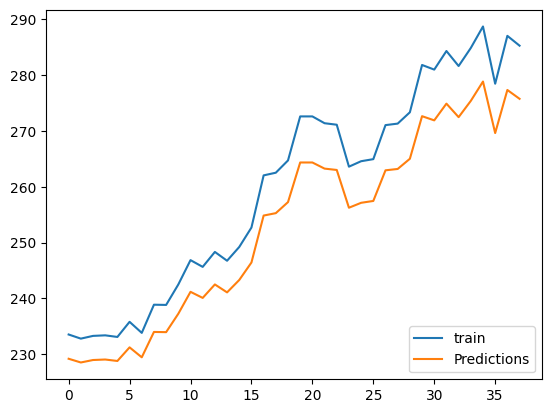

[[2.08542904 1.89973914 2.02460225 ... 7.02132546 7.60782477 7.49126281]
 [2.23942284 2.06760953 2.18289135 ... 7.06859333 7.65147033 7.53558352]
 [2.13869239 1.95806017 2.07942423 ... 7.03732919 7.62259724 7.50626468]
 ...
 [6.00882453 6.07008878 6.02959139 ... 2.97389049 4.17420786 3.95778119]
 [6.62027097 6.67592639 6.63912552 ... 1.05924939 3.1148027  2.81815837]
 [6.4995387  6.55621909 6.51874246 ... 1.64499047 3.3594613  3.08642203]]


In [106]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)
    

In [111]:
error = np.mean(error_main, axis=1)
error

array([5.2171619 , 5.29425375, 5.24351155, 5.23301281, 5.26332469,
       4.9582799 , 5.18616778, 4.61265644, 4.61194708, 4.50298961,
       4.34382469, 4.38201904, 4.2655941 , 4.34796992, 4.25161767,
       4.08738526, 4.04932699, 4.04546078, 4.01237247, 3.73293311,
       3.73293311, 3.76461049, 3.77255733, 4.03227437, 4.01520403,
       4.00750267, 3.77410273, 3.76698317, 3.73079102, 3.78776051,
       3.77025563, 3.99512296, 3.78626949, 4.02960423, 4.19604397,
       3.8016778 , 4.13552189, 4.05315961])

In [113]:
print(np.mean(error))

4.257741698763272


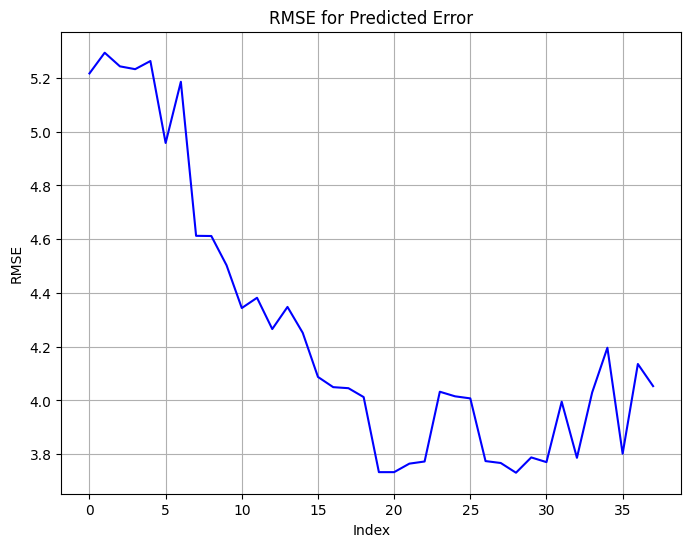

In [112]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(38), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [110]:
final_pred

array([229.17098999, 228.50498962, 228.94599915, 229.03598022,
       228.7749939 , 231.21398926, 229.43199158, 233.97698975,
       233.94099426, 237.24398804, 241.16799927, 240.07899475,
       242.49099731, 241.06900024, 243.29199219, 246.42399597,
       254.83900452, 255.27098083, 257.25097656, 264.35198975,
       264.35198975, 263.2539978 , 263.01098633, 256.24298096,
       257.125     , 257.45800781, 262.94799805, 263.190979  ,
       265.01800537, 272.64996338, 271.90298462, 274.89996338,
       272.47900391, 275.39498901, 278.85998535, 269.62597656,
       277.34799194, 275.76400757])